<a href="https://colab.research.google.com/github/MataiasCost/Python_UERJ/blob/main/Projeto_1_Grupo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 : Mudanças climáticas
___
#### Data de divulgação do projeto : 7/Outubro/2021
#### Prazo de entrega ***ESTENDIDO***: 28/Outubro/2021

___
Os modelos de mudança climática são muito complexos, devem levar em consideração radiação de corpo negro, termodinámica de gases, dinámica dos oceanos e fluctuações. Em 2021 os [ganhadores do Premio Nobel de Física](https://www.nobelprize.org/prizes/physics/2021/press-release/)  Klaus Hasselmann, Syukuro Manabe e Giorgio Parisi  foram laureados pela sua contribuição à modelagem computacional e teórica do clima terrestre. 


Uma forma simplista de começar entender a dinámica da temperatura frente a regulamentações ambientais (de gases de efeito estufa, por exemplo) e da retroalimentação do sistema climático global é a seguinte equação diferencial:


$\dfrac{dC}{dt} =\dfrac{1}{10} (C - 20)(22 - C)(C - 26) - k $


onde $C$ é a temperatura em graus Celsius no equador e $k$ é uma medida das regulamentações implementadas, onde $k$ positivo é mais regulamentação e $k$ negativo é "desregulamentação". [Fonte](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1035&context=codee) 


## Parte 1 
***(4pt)***

Usando integração  numérica (o mêtodo da sua escolha) escreva um programa que resolva a equação diferencial  para um valor de $k$ e da temperatura inicial $C_0$ arbitrários. O resultado deve ser apresentado em forma de um gráfico da evolução da temperatura no equador em função do tempo para um intervalo de 50 anos.

Chame a sua função para fazer o gráfico para $C_0=20^{\circ} \, \mathrm{C}$ e alguns valores de $k$ (p.ex. Figura abaixo).

O programa **deve utilizar funções, encapsulamento e generalização** quando possível.


_Dica: Pode chamar e utilizar os módulos `math`, `matplotlib`, `numpy` e/ou `scipy`._



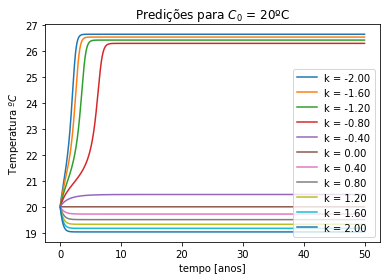

Na primeira etapa desse trabalho foi construído o código abaixo. Ele pede a quantidade de ks, os valores dos ks e o valor da temperatura (inicial) no equador. Com esses valores, ele retorna um gráfico com as soluções da EDO para as configurações escolhidas. Ele é dividido basicamente em três funções:
1. **adquirir_quantidade_de_ks_e_seus_valores** - Recebe a quantidade de ks e seus respectivos valores.
2. **adquirir_valor_da_temperatura** - Recebe o valor da temperatura
3. **fazer_hist** - Recebe as informações das outras duas funções e usa o pacote do scipy.intregate para resolver a EDO. Então, gera um plot contendo todas as soluções.

Bot: Bom dia, tarde ou noite. Esse programa tem como objetivo desenhar o grafico da temperatura ao longo dos anos. Por favor, responda as perguntas a seguir para que o programa funcione corretamente.
Bot: Uma dica: colocando 999 como resposta em qualquer uma das perguntas, o programa retornará o exemplo das professoras.
Quantos k's você quer testar? 999


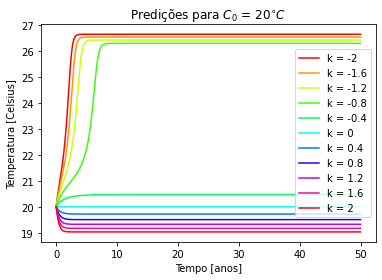

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import Image


# Descrição do funcionamento desse codigo!

#Descrição: Ele resolve a EDO da questão 1 do curso de Python
#Nota: O programa não é 100% a prova de falhas AINDA!


#Nota: Procurar versões mais simples de implementar!
# Função responsavel por eu não precisar criar uma lista gigante de cores
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

#Primeiro definimos a função DC, sendo ela
def modelo(temperatura,t,valores_k):
  dcdt = (1/10)*(temperatura - 20)*(22- temperatura)*(temperatura - 26) - valores_k
  return dcdt


def adquirir_quantidade_de_ks_e_seus_valores():
  global flag
  global flag_exemplo_professora
  global valores_k
  while flag == False:
    try:
      n_k = int(input("Quantos k's você quer testar? "))
      flag = True
      if n_k == 999:
        flag_exemplo_professora = True;
        break
    except ValueError or IndentationError or SyntaxError:
      print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter, tentou hackiar o CERN (To de olho Gabriel, fica esperto @-@)  ")
      flag = False
  #Protegendo o codigo de pessoas que podem querer quebrar ele. ACHO que protegi contra tudo kkkkkk
  if n_k == 1:
    valor_k = float(input("Entre com o valor de k: "))
    valores_k.append(valor_k)
  elif n_k < 1:
    print("Eu vi o que você fez ai \(@o@)/ Tenta de novo parceiro mas dessa vez com 1 ou mais valores de k")
    while n_k < 1:
      try:
        n_k = int(input("Quantos k's você quer testar? "))
        if n_k == 999:
          flag_exemplo_professora = True;
        if n_k < 0:
          print("Por favor, escreve um número maior, ou igual, a 1...")
      except ValueError:
        print(" Talvez você não saiba português, então aqui vai: Oops!  That was no valid number.  Try again...")
  if n_k > 1:  
    for x in range(n_k):
      if  flag_exemplo_professora == True:
        valores_k = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
        break
      flag_2 = False
      while flag_2 == False:
        try:
          valor_k = float(input("Entre com os valores do k: "))
          flag_2 = True
          if valor_k == 999:
            flag_exemplo_professora = True;
        except ValueError or IndentationError or SyntaxError:
          print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter...Ta tentando hackiar o CERN de novo, Gabriel??  ")
          flag_2 = False 
      valores_k.append(valor_k)  

def adquirir_valor_da_temperatura():
  global flag_3
  global flag_exemplo_professora
  global temperatura
  while flag_3 == False:
    if flag_exemplo_professora == True:
      temperature = 20
      break
    try:
      temperatura = float(input("Entre com o valor da temperatura, em graus celsius, no equador:"))
      if temperatura < -273:
        print("Infelizmente o resultado do programa não deve representar a realidade. Mas pra consulta aqui está o resultado:")
      flag_3 = True
      if temperatura == 999:
        flag_exemplo_professora = True;
    except ValueError or IndentationError or SyntaxError:
      print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter...Gabriel eu juro que se for você...  ")
      flag_3 = False 
  if flag_exemplo_professora == True:
    valores_k = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
    temperatura = 20



def fazer_hist():
  cmap = get_cmap(len(valores_k))
  for i in range(len(valores_k)):
    #Resolvendo a EDO
    y = odeint(modelo,temperatura,t,args=(valores_k[i],))
    labels = 'k = '+ str(valores_k[i])
    plt.plot(t,y,label=labels,color = cmap(i))
  titulo = r"Predições para $C_{0}$ = $"+str(temperatura)+ r" ^{\circ}C$"
  plt.xlabel("Tempo [anos]")
  plt.ylabel("Temperatura [Celsius]")
  plt.title(titulo)
  plt.legend()
  plt.show()

######################################################################################################
# MAIN 
print("Bot: Bom dia, tarde ou noite. Esse programa tem como objetivo desenhar o grafico da temperatura ao longo dos anos. Por favor, responda as perguntas a seguir para que o programa funcione corretamente.")
print("Bot: Uma dica: colocando 999 como resposta em qualquer uma das perguntas, o programa retornará o exemplo das professoras.")
#determinando o tempo
t = np.linspace(0,50,10000)     # Dividindo o intervalo de 50 anos em 10000 steps
flag_exemplo_professora = False # Se ela estiver verdadeira, vai gerar o modelo de exemplo da professora. Pode ser ativada em qualquer umas das etapas de preenchimento de valor, basta colocar 42, que é a resposta para a Grande Pergunta sobre a Vida, o Universo e Tudo o Mais
flag = False   # Flag que determina se o número de ks faz sentido
valores_k = []  # Lista com os valores dos k's
flag_3 = False  # Flag que determina se o valor da temperatura faz sentido
adquirir_quantidade_de_ks_e_seus_valores()    #Adquire a quantidade de k e seus valores
adquirir_valor_da_temperatura()               # Adquire o valor da temperatura em celsius.
fazer_hist()                                  #Faz os histogramas com as informações coletadas.


## Parte 2:
***(4pt)***


Modifique o programa anterior para ser um **módulo**.

Em um novo programa, chame o módulo para obter a solução da equação diferencial para um conjunto de valores variados de $k$ e $C_0$ em uma "_rede_" (ou matriz), isto quer dizer, percorrendo valores de  $k \in [k_{min},k_{max}]$ e $ C_0 \in [C_0^{min},C_0^{max}]$ em intervalos regulares.

A **temperatura de equilibrio** (ou de estabilização) ($T_{fin}$) é aquela que se mantem relativamente estável após um certo intervalo. Para determiná-la, escreva no seu programa um algoritmo que ache este valor e o tempo necessário para chegar nele (quantitativamente). 

Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$ ou qualquer outra relação relevante (justifique). 

_Dica 1: o gráfico_ $T_{fin} \times k$ _é chamado de diagrama de bifurcação e pode ser usado para responder algumas perguntas da parte 3._

_Dica 2: pode ser usado o gráfico de dispersão `scatter` a opção `c=z` com `cmap` do matplotlib [site](https://matplotlib.org/stable/tutorials/colors/colormaps.html)._

```python
plt.scatter(x,y,c=z,cmap="rainbow")
```



 



**(Questão 2)**

A modificação do código para um módulo pode ser vista no célula abaixo. Ele foi modificado para que pudesse calcular a temperatura de equilíbrio, além de produzir plots de temperatura inicial em função de k, e vice-versa, e o gráfico de bifurcação. Todos os plots produzidos aqui serão utilizados para elucidar as respostas para a questão 3. Segue uma descrição das funções presentes no código:
1.   **modelo** - Função utilizada no scipy.odeint para obter a solução da EDO.
2.   **get_cmap** - Função que preenche as cores dos plots.
3.   **Adquirir_valores_e_fazer_plots** - Recebe uma lista de valores de k, uma lista de temperaturas inicias e, dependendo das flags e tipos inseridos pelo usuário, retorna uma serie de plots. 

Descrição das flags:


*   flag_quero_temp_equilibrio - Se for True, coloca na legenda os valores da temperatura final e do tempo, em anos, necessário para atingí-la;
*   flag_inverter - Inverte os eixos dos gráficos;
* Flag_KxT - Cria histogramas da temperatura final em função dos valores de k. Por definição, gera um plot de bifurcação entre $T_{inf}$ e k. Contudo, há outros dois tipos de gráficos que podem ser gerados: o tipo = 2, que retorna o gráfico de bifurcação com os eixos invertidos, e o tipo = 1 que retorna um gráfico da temperatura inicial em função de k;
*tempo - intervalo de tempo que deseja calcular a evolução da temperatura;
*size - tamanho dos gráficos.

4. **achar_temperatura_equilibrio_e_tempo_pra_chegar_nela** - Retorna uma booleana, que nos informando se foi possível reconstruir a temperatura final. Além disso, também retorna seu valor e o tempo necessário para atingi-lá.

In [2]:
#PRIMEIRA PARTE da PARTE 2: Modificar o programa anterior para ser um módulo.
#Nota: Essa é uma versão simplificada da apresentada no exercício 1.
#Foram retirados os metôdos de proteção e o sistema de input(), mas funciona perfeitamente.
%%writefile Parte_1.py
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



def modelo(temperatura,t,valores_k):
  dcdt = (1/10)*(temperatura - 20)*(22- temperatura)*(temperatura - 26) - valores_k
  return dcdt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


def adquirir_valores_e_fazer_plots(valores_k,lista_temperatura,size=(15,6),tempo=np.linspace(0,50),flag_quero_temp_equilibrio=False, flag_inverter=False,flag_KxT=False,tipo=3):
  t = tempo     
  if flag_KxT:
    lista_temperatura_equilibrio=[]
    lista_valores_k=[]
    lista_temperatura_inicial = []
    if isinstance(valores_k,np.ndarray):
      cmap = get_cmap(len(lista_temperatura))
      for i in range(len(valores_k)):
        #Resolvendo a EDO
        for x in range(len(lista_temperatura)):
          y = odeint(modelo,lista_temperatura[x],t,args=(valores_k[i],))
          flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
          lista_temperatura_equilibrio.append(valor_da_temperatura_de_equilibrio)
          lista_valores_k.append(valores_k[i])
          lista_temperatura_inicial.append(lista_temperatura[x])
          if flag_equilibrio or flag_quero_temp_equilibrio:
            labels = r'$C_{0}$: ' + str(round(lista_temperatura[x],1)) + r';$T_{fin}$:' + str(np.round(valor_da_temperatura_de_equilibrio,2)) +r'; Tempo:' + str(tempo_pro_equilibrio) + ' anos'
          else:
            labels = r'$C_{0}$ = '+ str(round(lista_temperatura[x],1))  
      if tipo == 1:
        plt.figure(figsize=size)
        plt.scatter(lista_valores_k,lista_temperatura_inicial,c=lista_temperatura_equilibrio,cmap="rainbow")
        titulo = r"Distribuição $T_{inicial}$ x k"
        plt.xlabel("$k$")
        plt.ylabel("Temperatura de inicial $[^{\circ}C]$")
        cbar=plt.colorbar()
        cbar.ax.set_title(r'$T_{inf}$ $[^{\circ}C]$')
        plt.title(titulo)
      if tipo == 2:
        plt.figure(figsize=size)
        plt.scatter(lista_temperatura_equilibrio,lista_valores_k,c=lista_temperatura_inicial,cmap="rainbow")
        plt.ylabel("Valor de k")
        plt.xlabel("Temperatura de equilibrio $[^{\circ}C]$")
        cbar = plt.colorbar()
        cbar.ax.set_title(r'$C_{0}$ $[^{\circ}C]$')        
        titulo = r"Distribuição $T_{inf}$ x k"
        plt.title(titulo)
        
      if tipo ==3:
        plt.figure(figsize=size)
        plt.scatter(lista_valores_k,lista_temperatura_equilibrio,c=lista_temperatura_inicial,cmap="rainbow")
        plt.xlabel("Valor de k")
        plt.ylabel("Temperatura de equilibrio $[^{\circ}C]$")
        cbar=plt.colorbar()
        cbar.ax.set_title(r'$C_{0}$ $[^{\circ}C]$')
        titulo = r"Grafico Bifurcação k x $T_{inf}$"
        plt.title(titulo)
        
      plt.show()  

  if flag_inverter:
    if isinstance(valores_k,np.ndarray):
      cmap = get_cmap(len(lista_temperatura))
      for i in range(len(valores_k)):
        plt.figure(figsize=size)
        for x in range(len(lista_temperatura)):
          y = odeint(modelo,lista_temperatura[x],t,args=(valores_k[i],))
          flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
          if flag_equilibrio or flag_quero_temp_equilibrio:
            labels = r'$C_{0}$: ' + str(round(lista_temperatura[x],1)) + r';$T_{fin}$:' + str(np.round(valor_da_temperatura_de_equilibrio,2)) +r'; Tempo:' + str(tempo_pro_equilibrio) + ' anos'
          else:
            labels = r'$C_{0}$ = '+ str(round(lista_temperatura[x],1))
          plt.plot(t,y,label=labels,color = cmap(x))
        titulo = r"Predições para k = "+str(round(valores_k[i],3))
        plt.xlabel("Tempo [anos]")
        plt.ylabel("Temperatura $[^{\circ}C]$")
        plt.title(titulo)
        plt.legend( prop={'size': 10})
        plt.show()  
    else:
      for x in range(len(lista_temperatura)):
        plt.figure(figsize=size)
        y = odeint(modelo,lista_temperatura[x],t,args=(valores_k,))
        flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
        if flag_equilibrio or flag_quero_temp_equilibrio:
          labels = r'$C_{0}$: ' + str(round(lista_temperatura[x],1)) + r';$T_{fin}$:' + str(np.round(valor_da_temperatura_de_equilibrio,2)) +r'; Tempo:' + str(tempo_pro_equilibrio) + ' anos'
        else:
          labels = r'$C_{0}$: '+ str(round(lista_temperatura[x],1))
        plt.plot(t,y,label=labels,color ='green')
        titulo = r"Predições para k = "+str(round(valores_k,3))
        plt.xlabel("Tempo [anos]")
        plt.ylabel("Temperatura $[^{\circ}C]$")
        plt.title(titulo)
        plt.legend( prop={'size': 10})
        plt.show()  
  if  not (flag_inverter or flag_KxT):
    for temperatura_inicial in lista_temperatura:
      if isinstance(valores_k,np.ndarray):
        cmap = get_cmap(len(valores_k))
        plt.figure(figsize=size)
        for i in range(len(valores_k)):
          #Resolvendo a EDO
          y = odeint(modelo,temperatura_inicial,t,args=(valores_k[i],))
          if flag_quero_temp_equilibrio:
            flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
            labels = 'k: ' + str(round(valores_k[i],1)) + r';$T_{fin}$:' + str(np.round(valor_da_temperatura_de_equilibrio,2)) +r'; Tempo:' + str(tempo_pro_equilibrio) + ' anos'
          else:
            labels = 'k = '+ str(round(valores_k[i],1))
          plt.plot(t,y,label=labels,color = cmap(i))
        titulo = r"Predições para $C_{0}$ = $"+str(temperatura_inicial)+ r" ^{\circ}C$"
        plt.xlabel("Tempo [anos]")
        plt.ylabel("Temperatura $[^{\circ}C]$")
        plt.title(titulo)
        plt.legend( prop={'size': 10})
        plt.show()
      else:

        y = odeint(modelo,temperatura_inicial,t,args=(valores_k,))
        if flag_quero_temp_equilibrio:
          flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
          labels = 'k: ' + str(round(valores_k,1)) + r';$T_{fin}$:' + str(np.round(valor_da_temperatura_de_equilibrio,2)) +r'; Tempo:' + str(tempo_pro_equilibrio) + ' anos'
        else:
          labels = 'k = '+ str(round(valores_k,1))
        plt.figure(figsize=size)
        plt.plot(t,y,label=labels,color ='green')
        titulo = r"Predições para $C_{0}$ = $"+str(temperatura_inicial)+ r" ^{\circ}C$"
        plt.xlabel("Tempo [anos]")
        plt.ylabel("Temperatura $[^{\circ}C]$")
        plt.title(titulo)
        plt.legend( prop={'size': 10})
        plt.show()

def achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y):      
  flag_chegamos_no_equilibrio = False
  valor_anterior = -999
  tempo_para_chegar_na_temperatura = 0
  for i in range(len(y)):
    if valor_anterior/y[i] > 0.99996 and valor_anterior/y[i] < 1.00004 :
      numero_de_ocorrencias += 1
      valor_anterior = y[i]
    else:
      numero_de_ocorrencias = 0
      valor_anterior = y[i]
    if numero_de_ocorrencias > 100:            # optei por escolher o valor da temperatura se ele se mantiver por mais de 100 steps do ano, ou seja, por volta de 1 anos.
      flag_chegamos_no_equilibrio = True
      tempo_para_chegar_na_temperatura = list(y).index(y[i])/100
      break 
  return flag_chegamos_no_equilibrio,tempo_para_chegar_na_temperatura, y[i]



Overwriting Parte_1.py


**Uma rede de valores de $k$ e $C_0$**

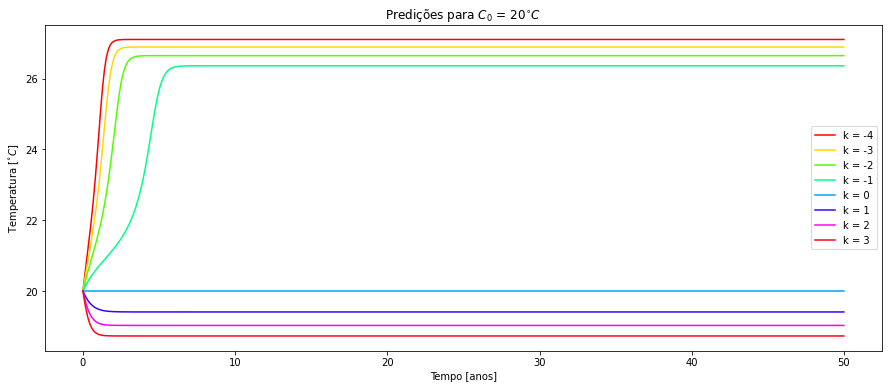

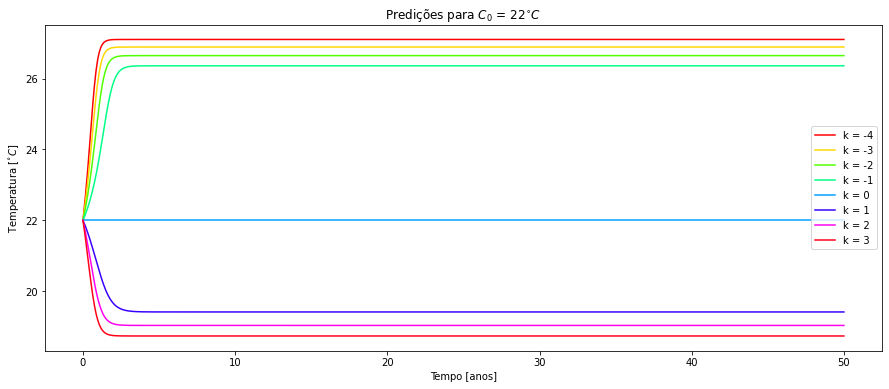

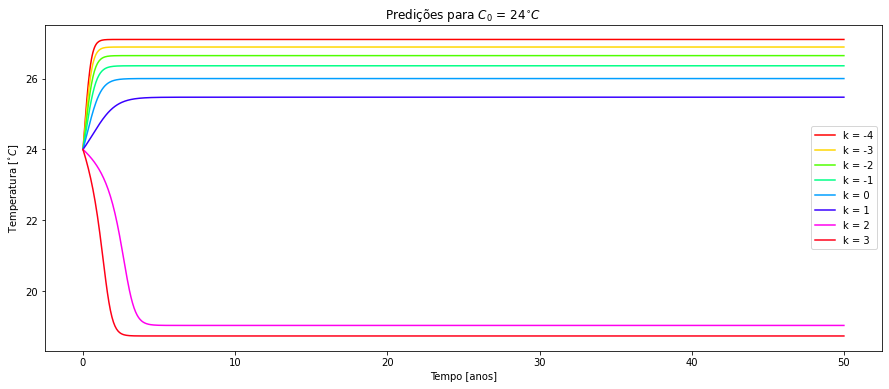

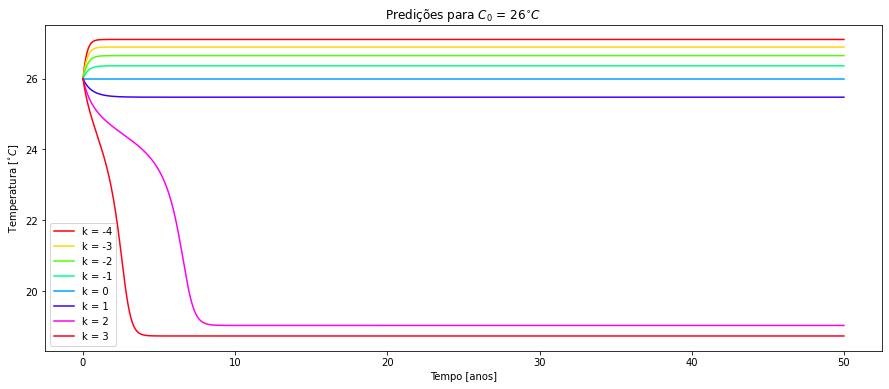

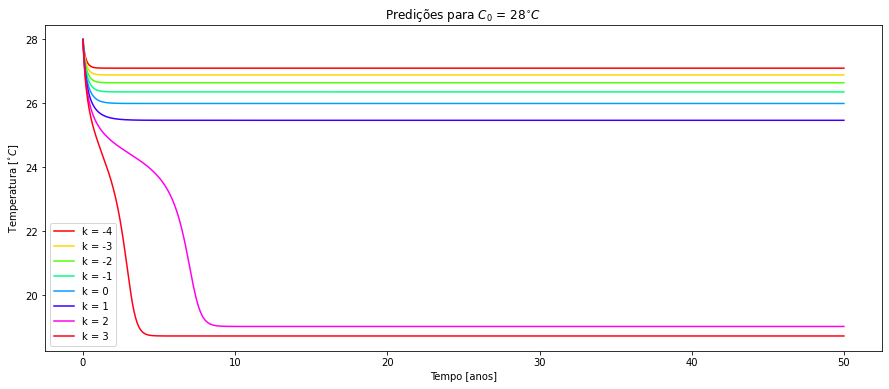

In [3]:
 #Primeira parte da PARTE 2:  Solução da equação diferencial para um conjunto de valores variados de k e C0 em uma "rede" (ou matriz)
 from Parte_1 import *               #Importanto todas os pacotes que o Parte_1 tem
 import Parte_1                      #Importando o modulo Parte_1

Lista_das_temperaturas = np.arange(20,30,2)                      
Lista_dos_valores_de_k = np.arange(-4,4,1)
tempo = np.linspace(0,50,1000) 

Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,tempo= tempo)

 

**Encontrando a temperatura de equilíbrio e o tempo para atingí-la para diversos valores de $k$ e $C_{0}$**

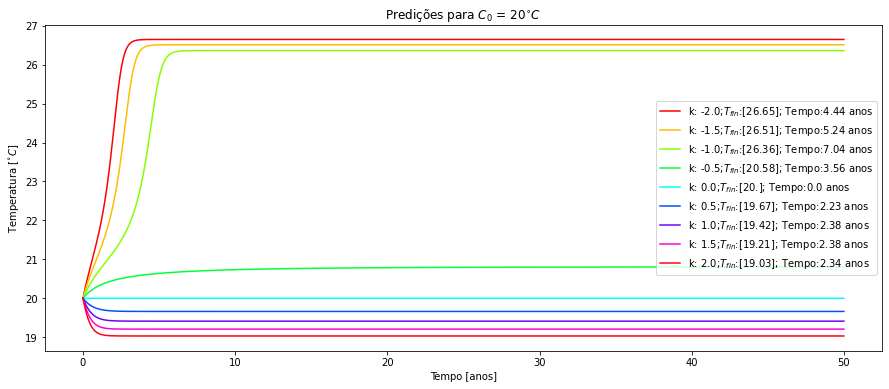

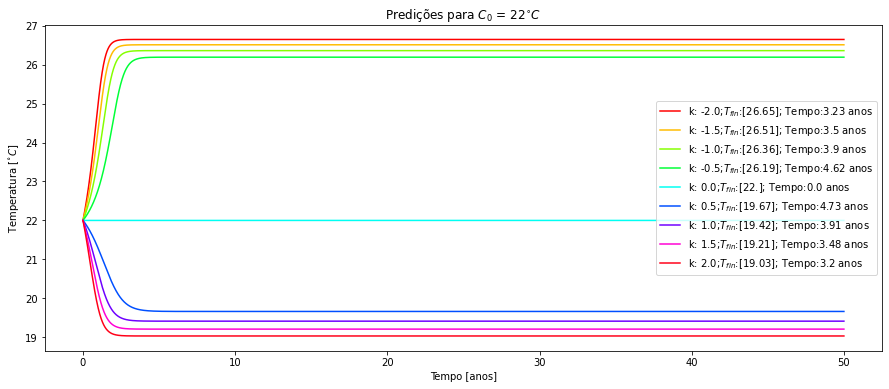

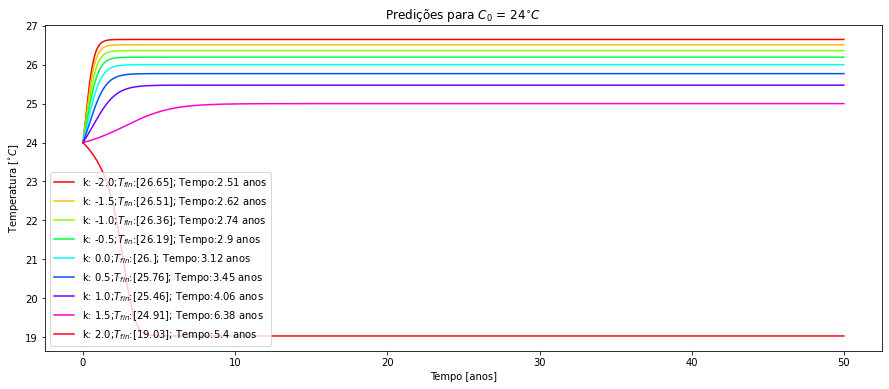

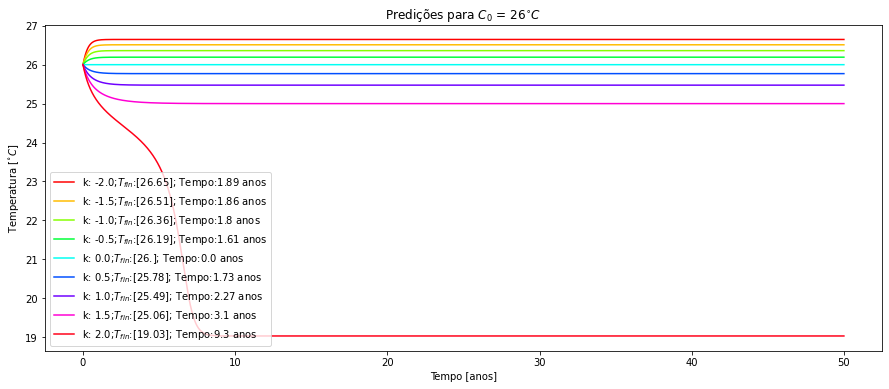

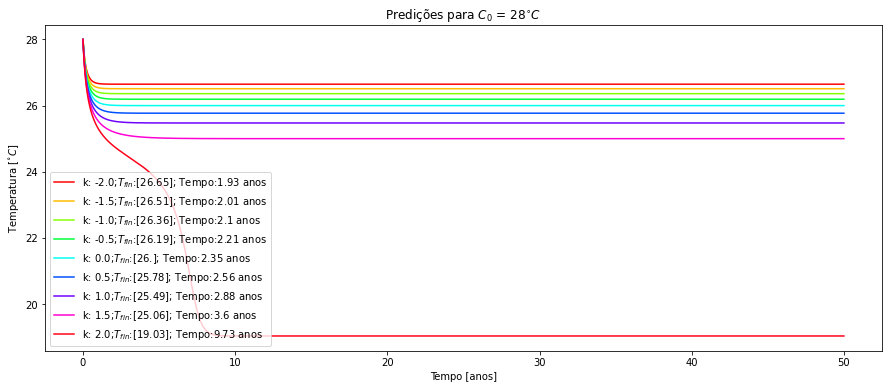

In [4]:
#Segunda parte da PARTE 2: Escrever no seu programa um algoritmo que ache a temperatura de quilíbrio e o tempo necessário para chegar nele (quantitativamente)
from Parte_1 import *               #Importanto todas os pacotes que o Parte_1 tem
import Parte_1                      #Importando o modulo Parte_1

#Exemplo de como adquirir os valores da temperatura de equilibrio e o tempo necessário para adquiri-la
#Nota: O nosso código foi feito considerando como temperatura de equilibrio aquela que apresenta-se uma variação menor que 0,004%, ao longo de 1 ano.
#Declaramos a lista que será utilizada
Lista_das_temperaturas = np.arange(20,30,2)                      
Lista_dos_valores_de_k = np.arange(-2,2.5,0.5)
tempo = np.linspace(0,50,5000) 
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_quero_temp_equilibrio=True,tempo=tempo)


A seguir são apresentados os gráficos de bifurcação, de diferentes tipos. Através deles vamos tirar conclusões acerca do comportamento da temperatura final (temperatura de estabilização) em função da temperatura inicial e valores de k

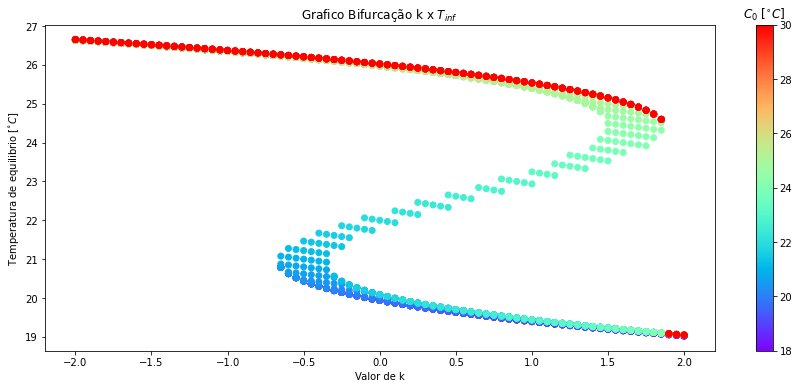

In [5]:
#Terceira parte da PARTE 2: Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ 
#e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$
from Parte_1 import *               #Importanto todas os pacotes que o Parte_1 tem
import Parte_1                      #Importando o modulo Parte_1

#Exemplo de como adquirir o gráfico de bifurcação entre os valores da temperatura de equilibrio e os de k
#Nota:O nosso código foi feito considerando como temperatura de equilibrio aquela que repetisse o valor 5 vezes consecutivas ao longo dos anos, com precisão de 3 casas decimais.
#Declaramos a lista que será utilizada
Lista_das_temperaturas = np.linspace(18,30,61)#np.arange(,30,2)                      
Lista_dos_valores_de_k = np.linspace(-2,2,81)#np.arange(-2,2,0.2)
tempo = np.linspace(0,50,10000) 

#print(Lista_das_temperaturas)

Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_KxT=True,tipo= 3,tempo = tempo)
#Lista_das_temperaturas = np.linspace(22,23,2)
#Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_KxT=True,tipo= 3)


Ou, alternativamente,

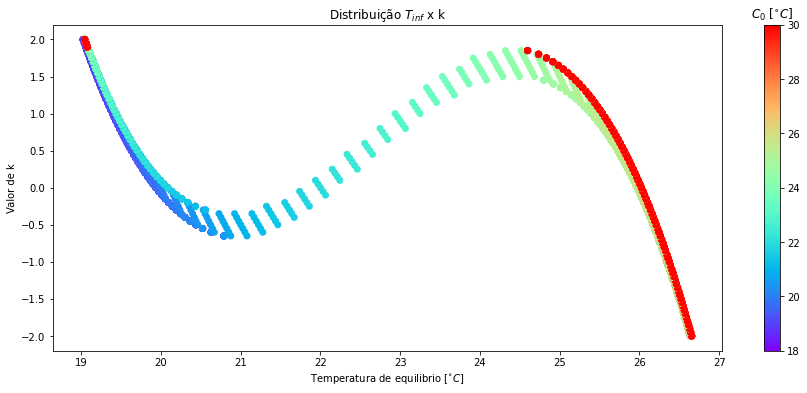

In [6]:
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_KxT=True,tipo= 2,tempo = tempo)

Podemos reparar em ambos os gráficos que, para alguns valores de $k$, encontramos 1, 2 ou até 3 temperaturas finais (tema que será abordado com maiores detalhes na questão 3). Isso fica mais evidente no plot da temperatura inicial em função de $k$, para diversos valores de temperatura final:

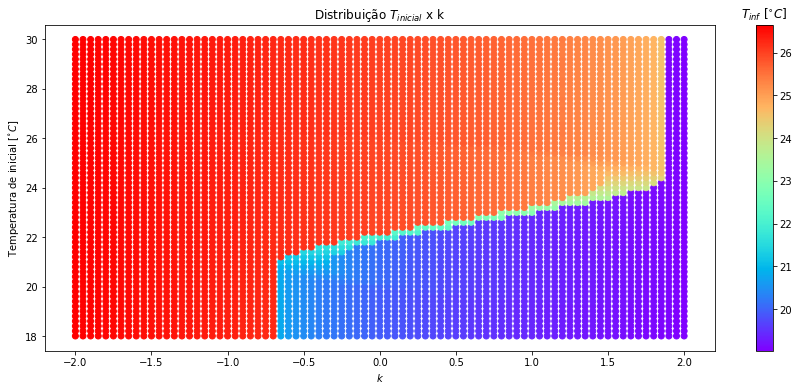

In [7]:
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_KxT=True,tipo= 1,tempo = tempo)

## Parte 3:

***(2pt)***


Responda as perguntas,  apresentando cálculos ou gráficos para justificar as suas respostas.

1. O que acontece com a temperatura de estabilização se a _desregularização_  $k$ (negativo) for menor que $\sim -0.6$ ?

1. O que acontece com a temperatura de estabilização se a _regularização_ $k$ (positivo) for maior que $\sim 1.8 $ ?

1. Se $k$ for mantido em 0, o que acontece com a temperatura final para um valor de temperatura inicial $C_0 = 22^{\circ} C$ ?  e se este valor flutuar em $0.1^{\circ} C$ para cima?

1. Modifique seu programa para simular a seguinte situação, começamos com uma temperatura de $21^{\circ}C$ e $k=-0.5$, depois de 5 anos a regulamentação e relaxada ainda mais, com $k=-0.6$.

   a) Qual a temperatura no equador no momento da transição de $k=-0.5$ a $k=-0.6$?

   b) Qual a tendência  da temperatura (ou seja, desce ou sobe) 5 anos após a mudança?

   c) Qual o valor mínimo de $k$ a partir desse momento (10 anos após o começo) para que a temperatura do equador não aumente nos próximos 50 anos?


**(Questão 3 — Itens 1 e 2)**: Através do último gráfico fica claro que para $k<-0.6$, a temperatura final converge para somente um valor, independentemente da temperatura inicial. Isso também é observado para $k>1.8$. Por outro lado, para $-0.6 < k < 1.8$, existem até três possíveis valores de temperaturas de equilíbrio, dependendo da temperatura inicial. Podemos notar, ainda, que os valores de temperatura final neste intervalo são "instáveis", isto é, alterando suavemente o valor da temperatura inicial, a temperatura de equilíbrio varia consideravelmente.

Este efeito também pode ser visualizado ao analisarmos a temperatura em função do tempo para diversos valores de temperatura inicial. Neste caso, dispomos um gráfico para cada valor de $k$. Portanto, podemos observar, mais uma vez, que tanto para $k<-0.6$ e $k>1.8$, a temperatura de equilíbrio não depende da temperatura inicial.

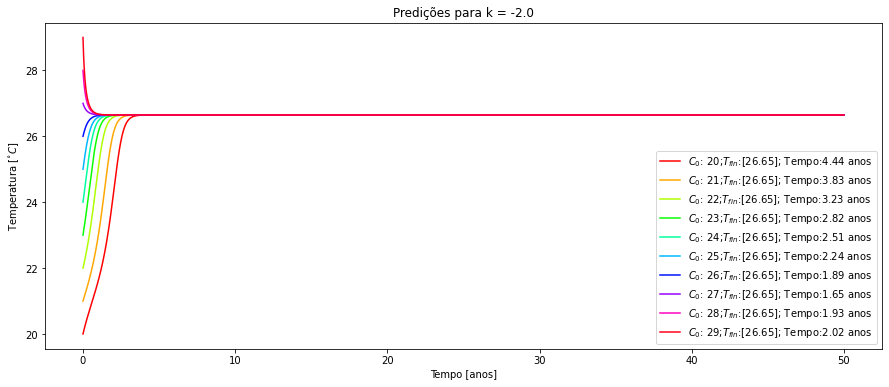

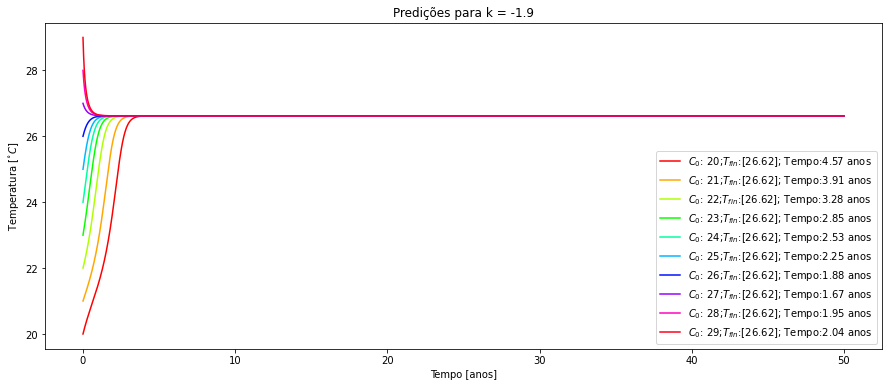

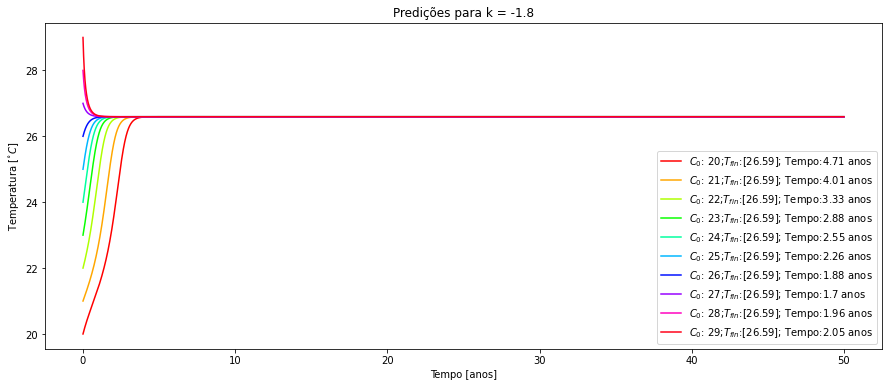

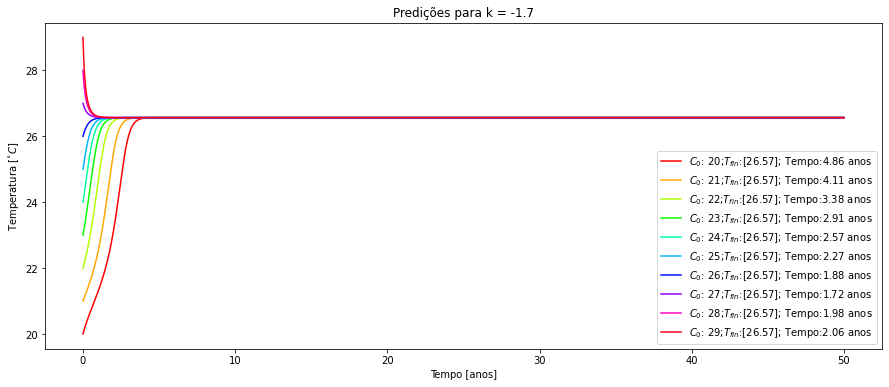

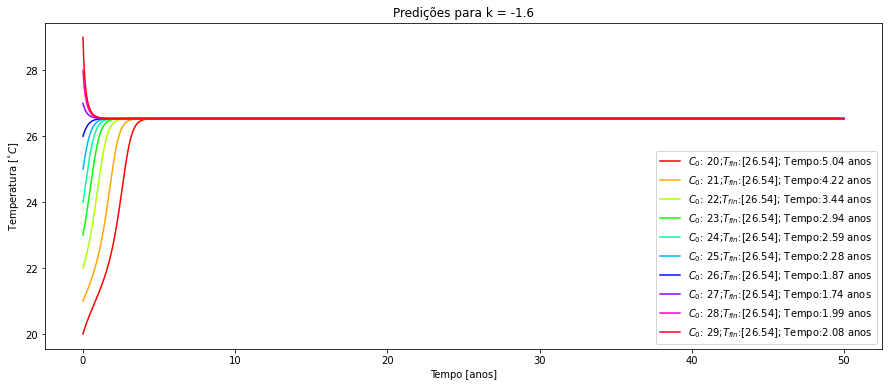

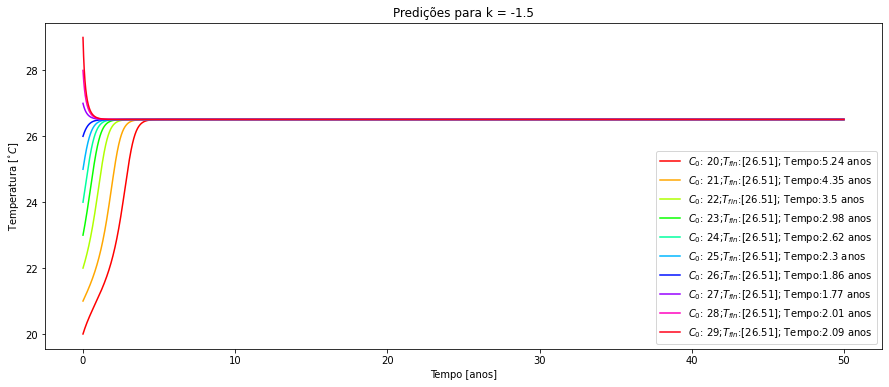

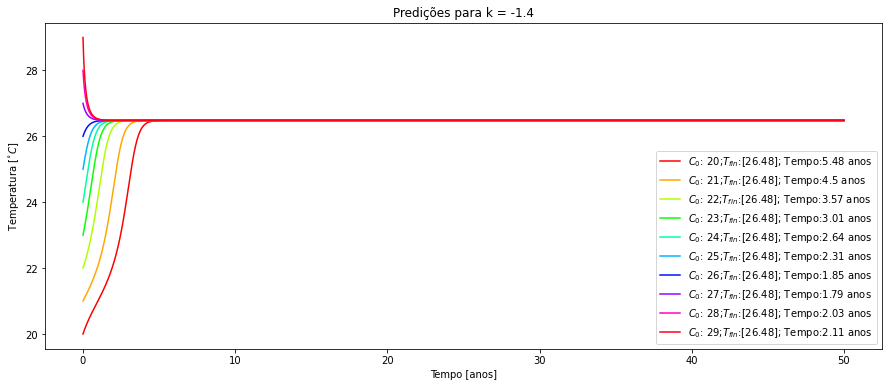

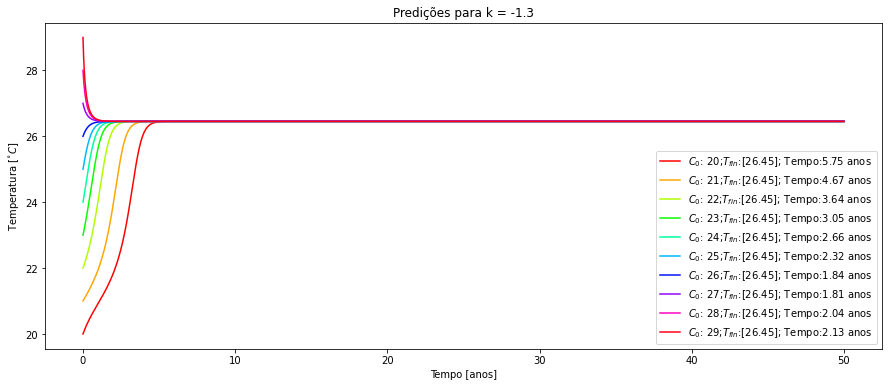

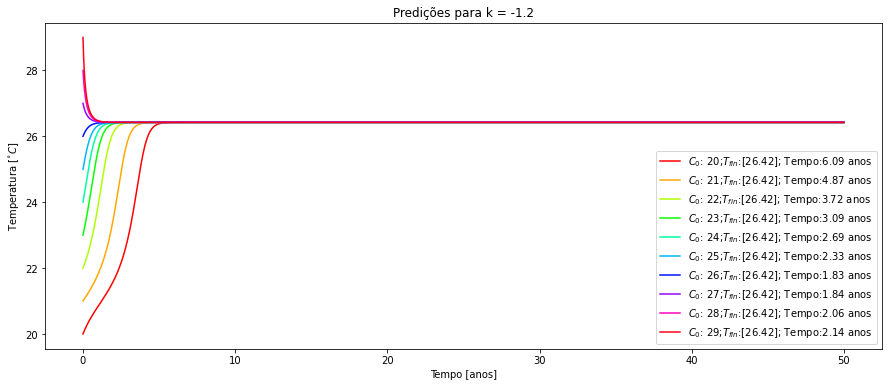

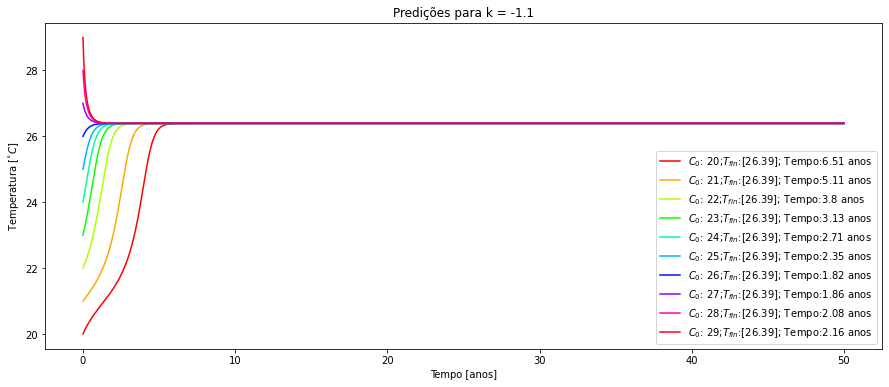

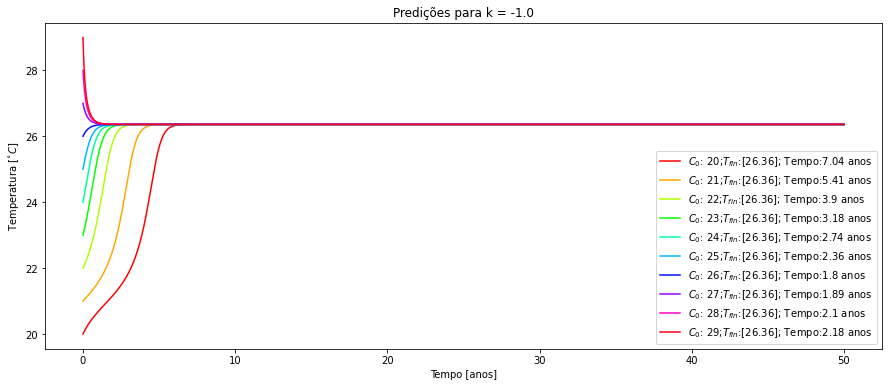

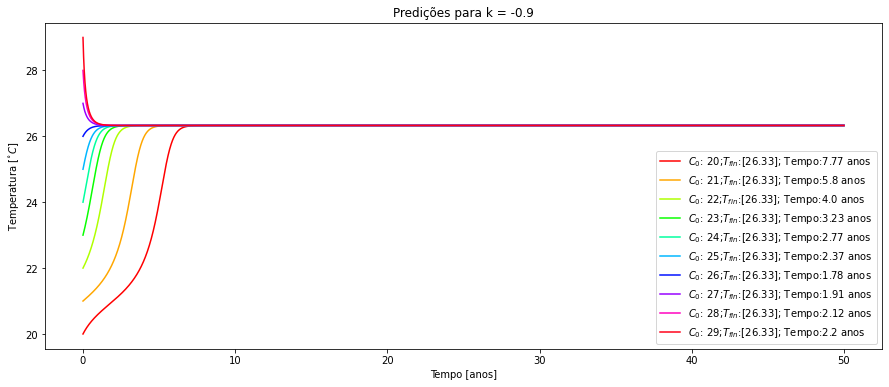

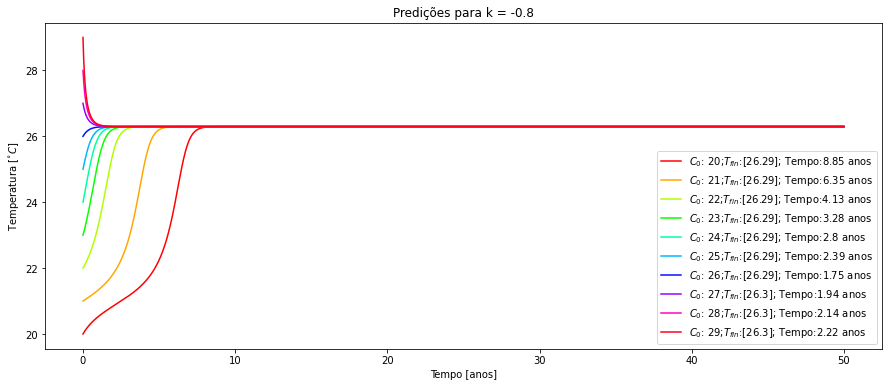

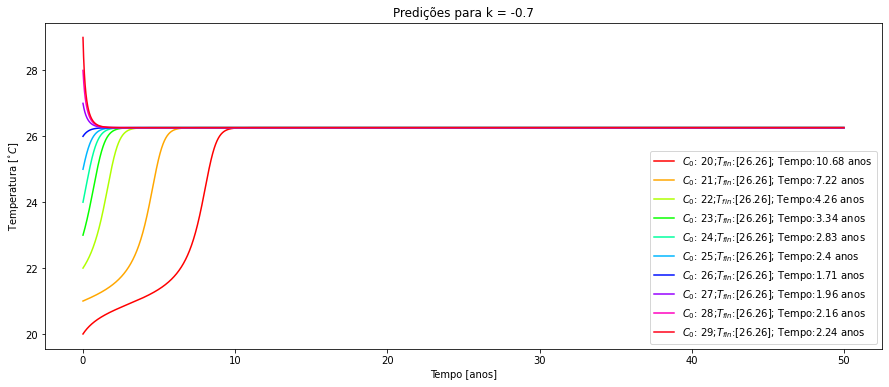

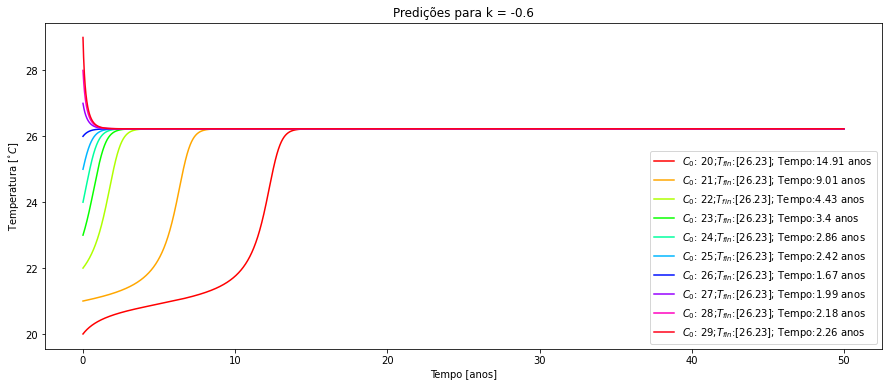

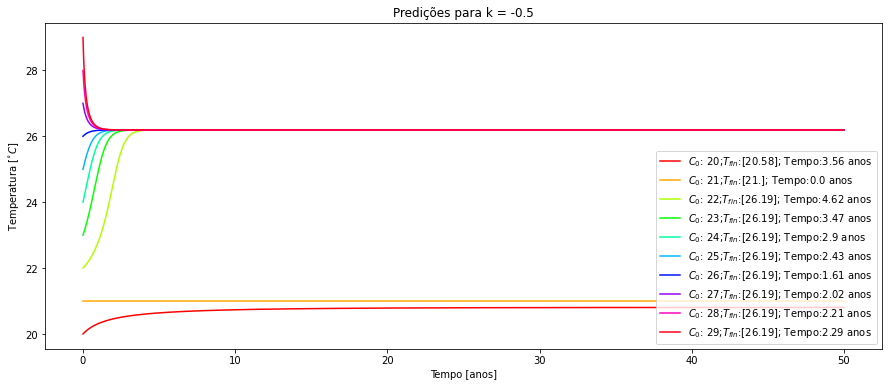

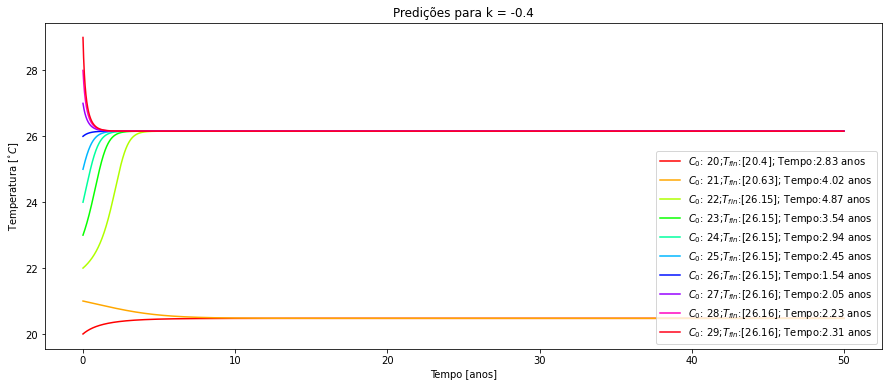

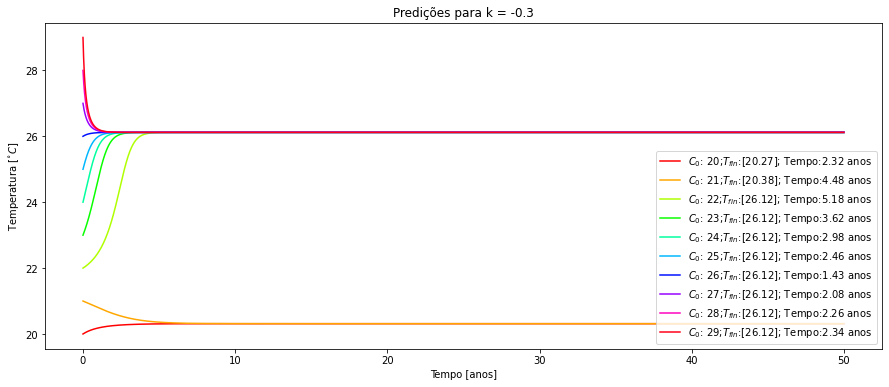

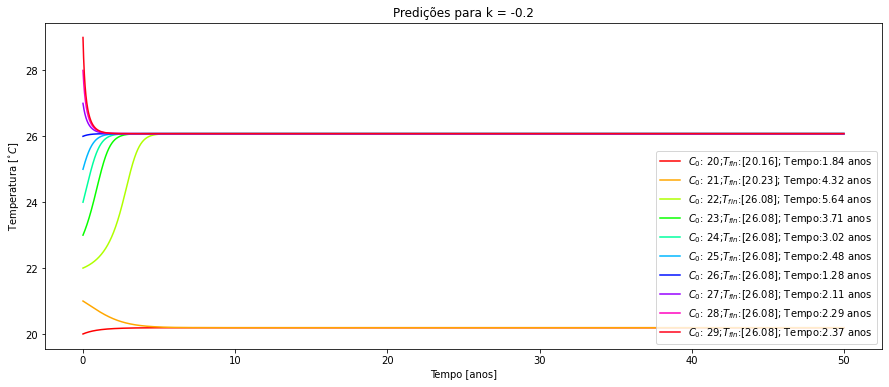

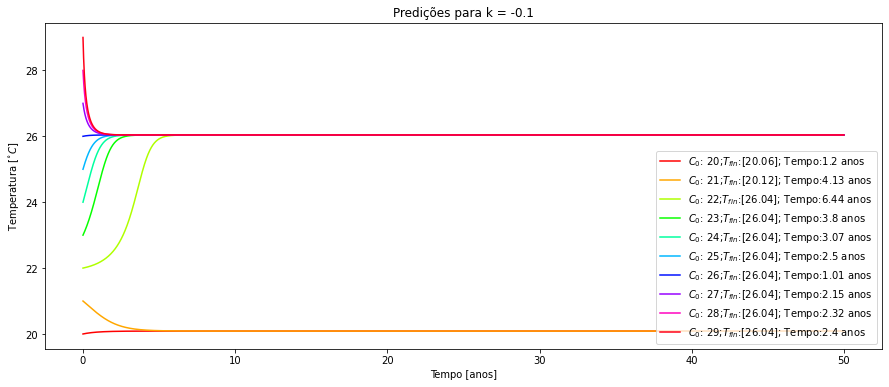

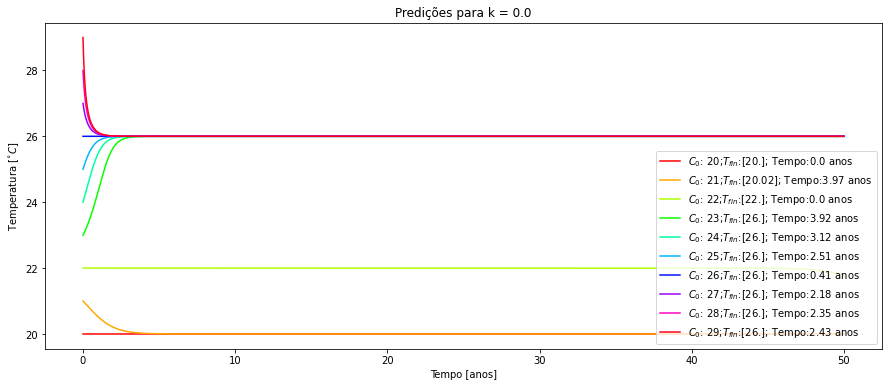

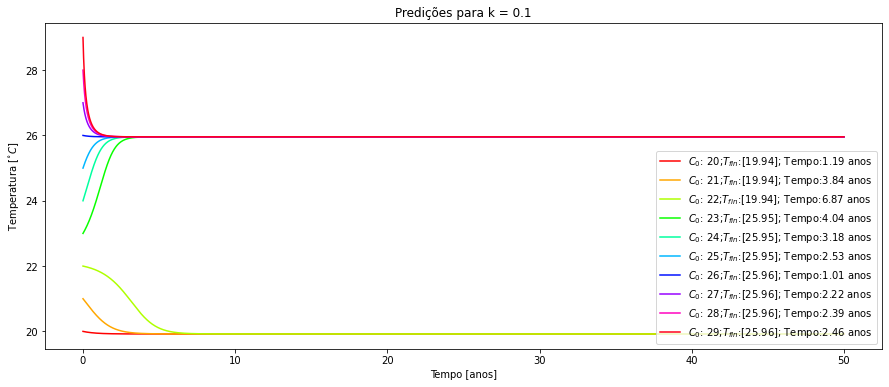

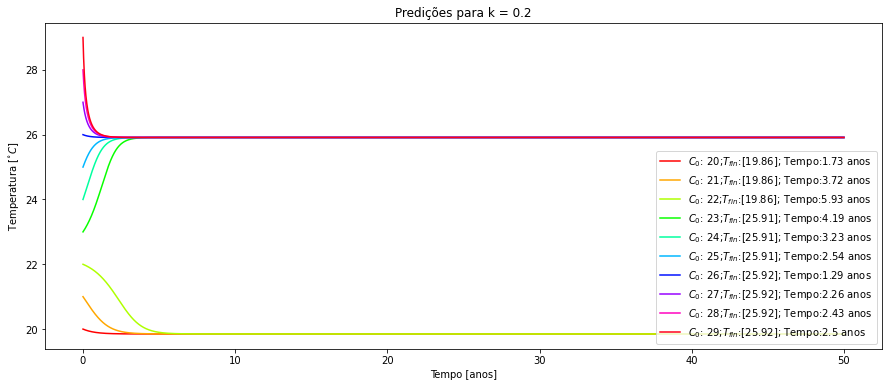

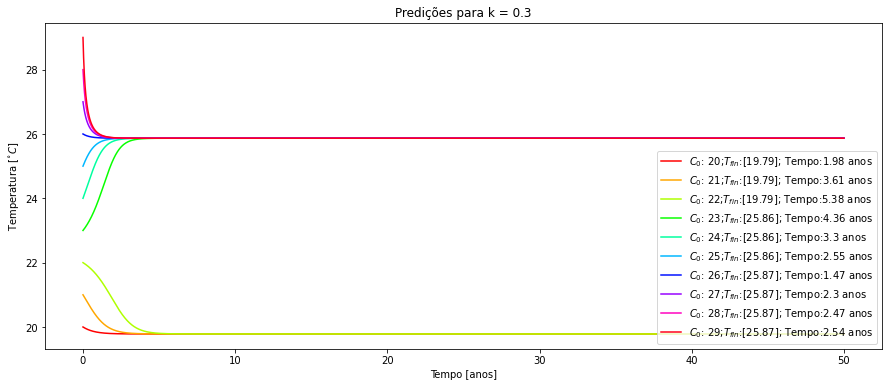

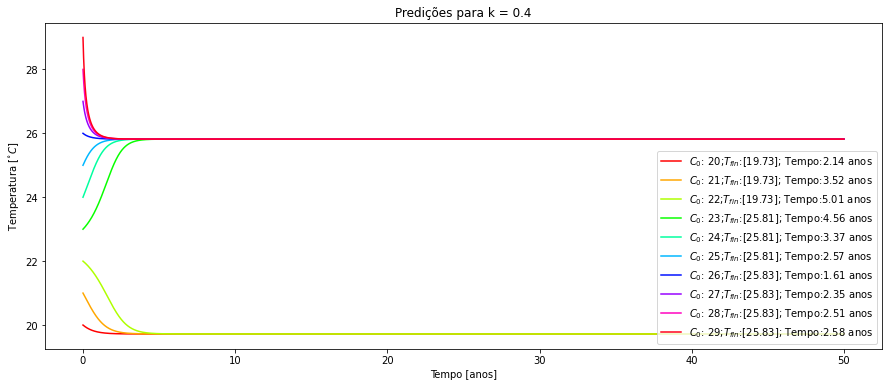

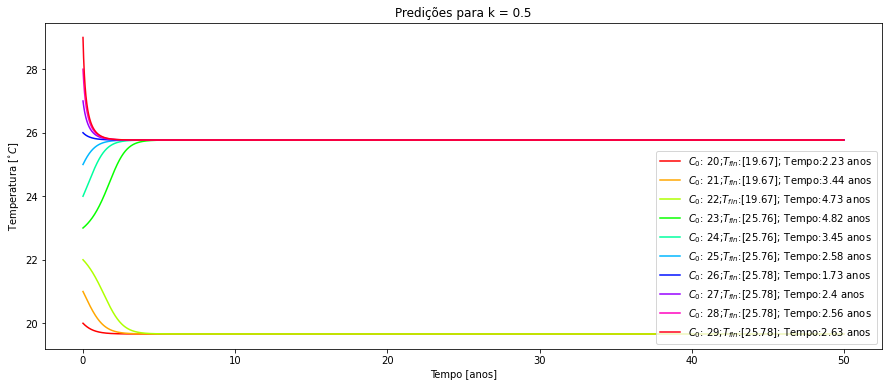

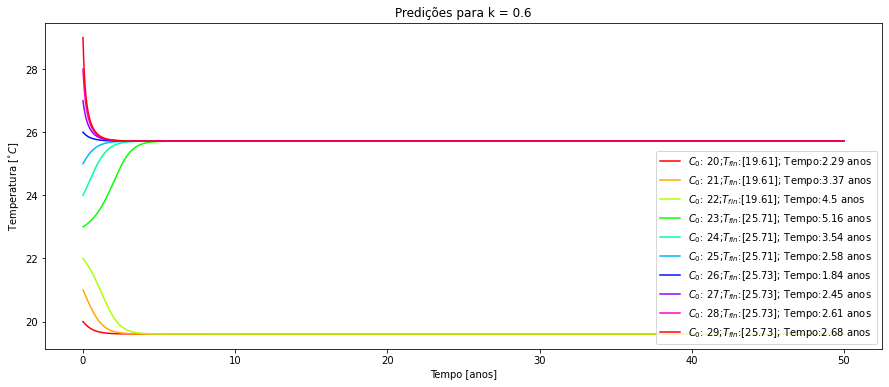

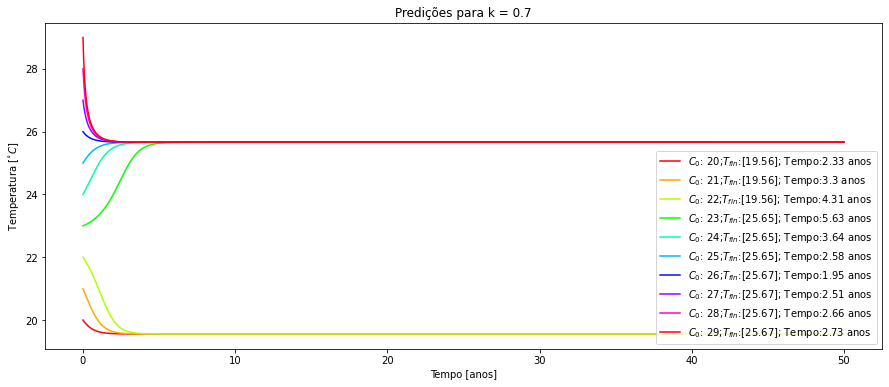

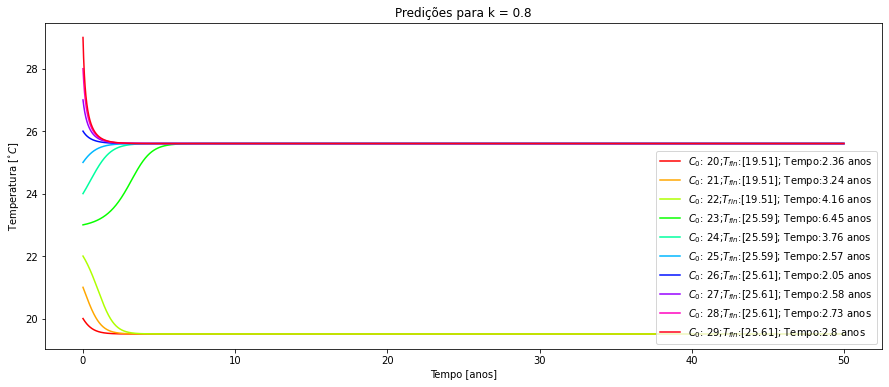

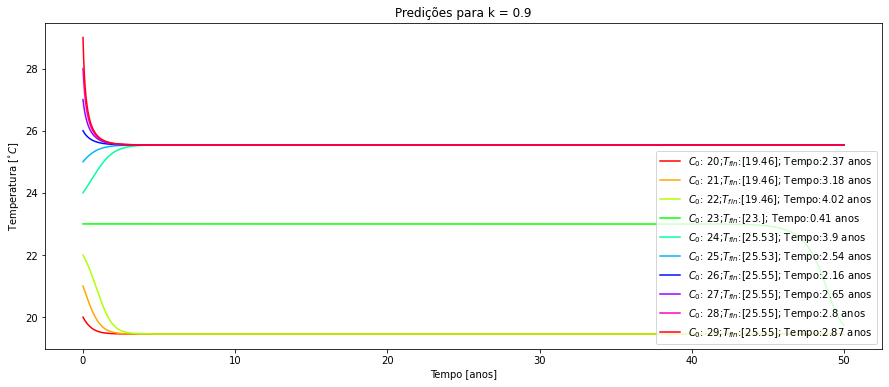

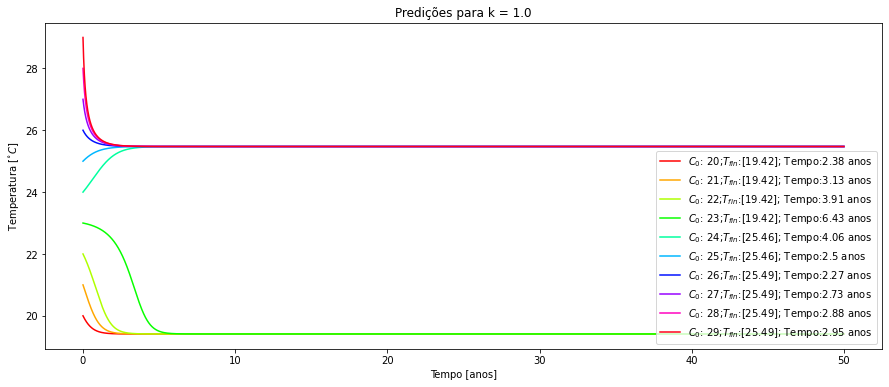

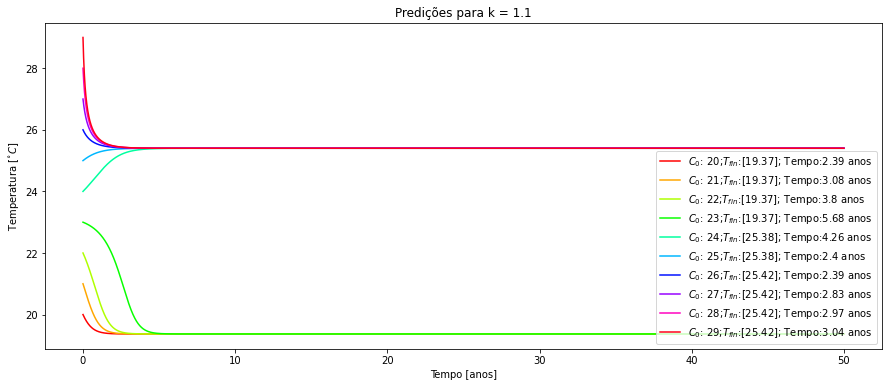

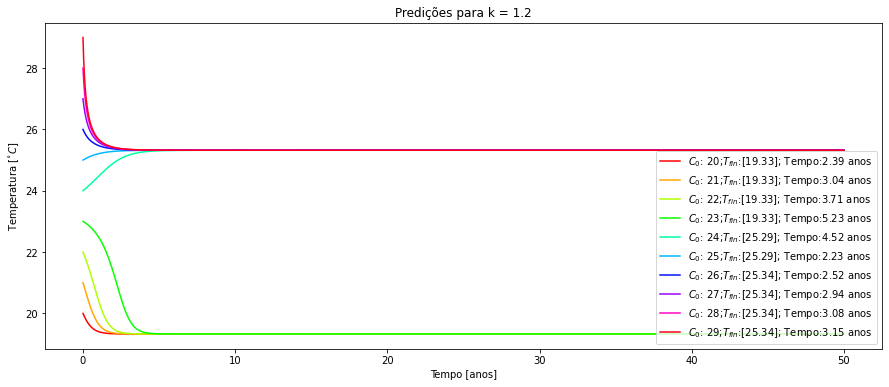

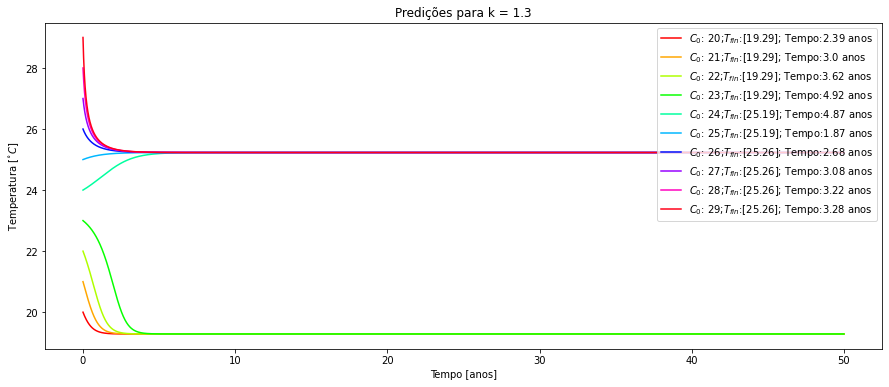

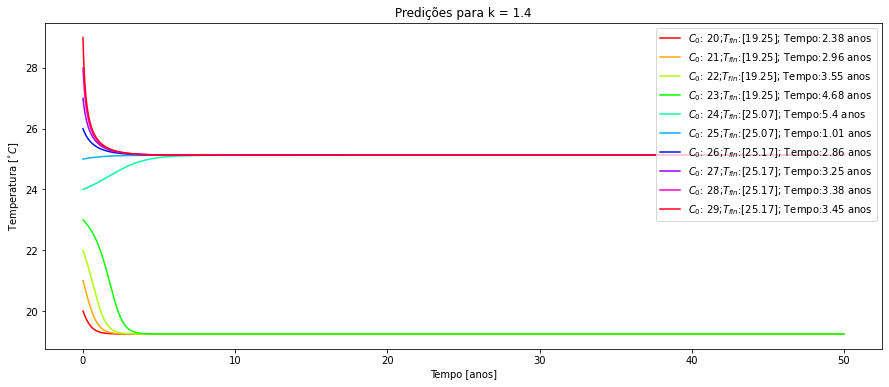

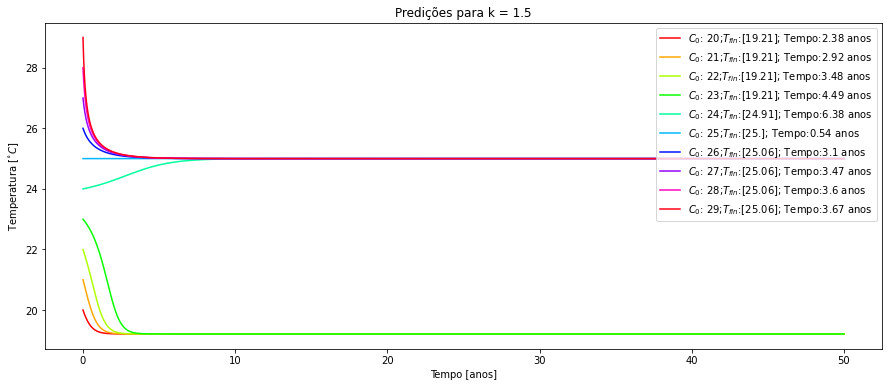

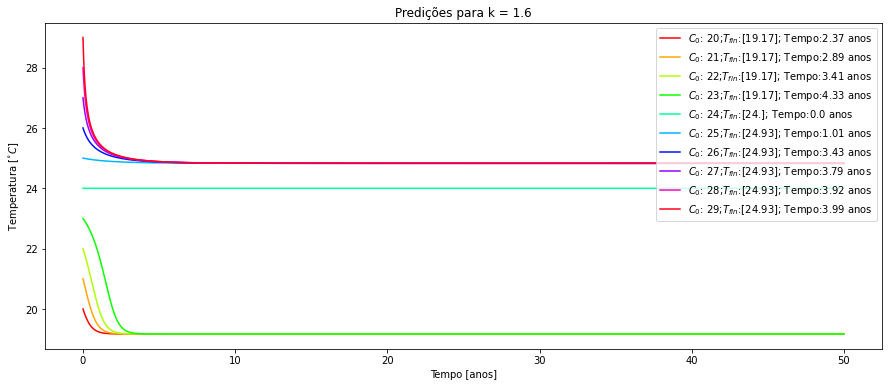

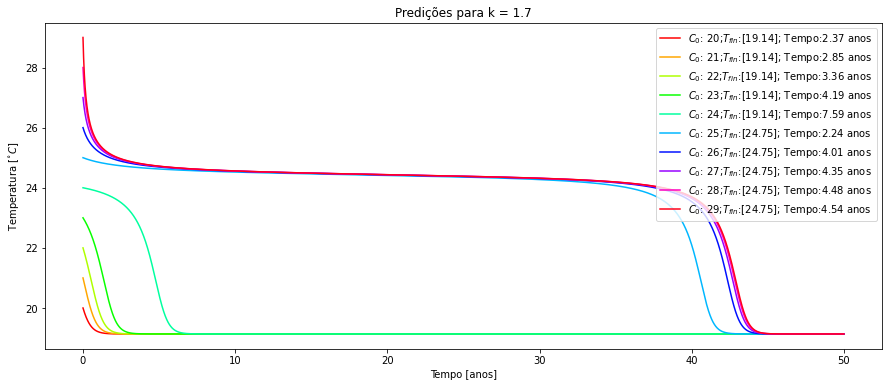

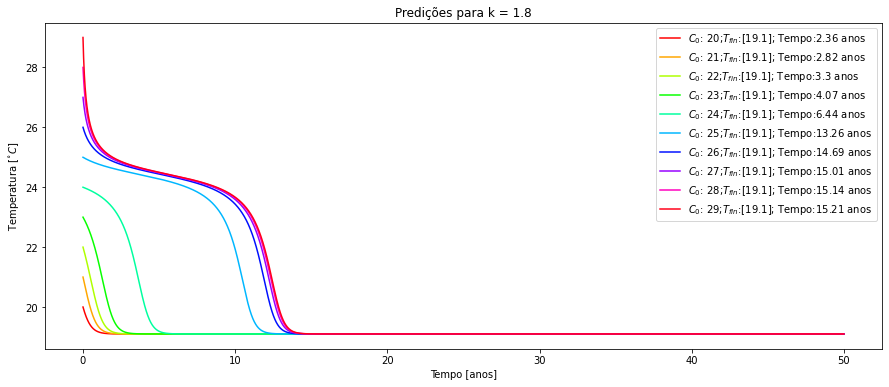

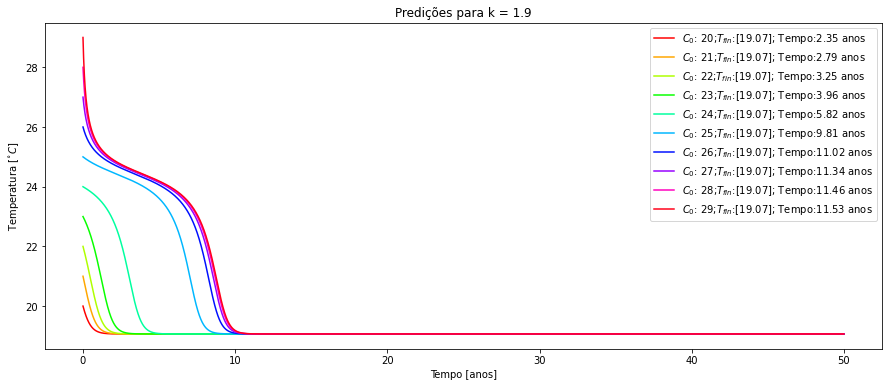

In [8]:
#Terceira parte da PARTE 2: Obter alguma outra distribuição interressante, e justificar.
#Exemplo de como adquirir o gráfico de bifurcação entre os valores da temperatura de equilibrio e os de k
#Declaramos a lista que será utilizada
from matplotlib.animation import FuncAnimation

Lista_das_temperaturas = np.arange(20,30,1)                      
Lista_dos_valores_de_k = np.arange(-2,2,0.1)


#fig = plt.subplots()
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_inverter= True, tempo = np.linspace(0,50,5000))

#animation = FuncAnimation(fig,func=Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_inverter= True),frames=np.arange(0,10,1),interval=10)


**(Questão 3 — Item 3)**:

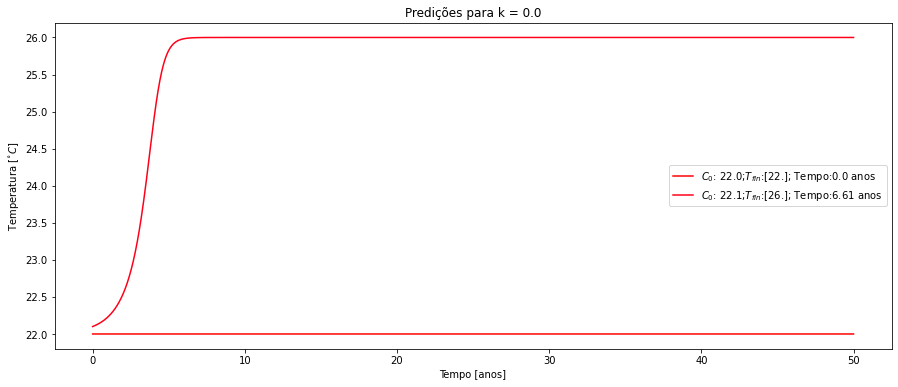

In [9]:
Lista_das_temperaturas = np.arange(22,22.1,0.1)                      # Declaração da lista de valores da temperatura, começando com 0 e chegando até 50, em intervalos de 50/10 graus
Lista_dos_valores_de_k = np.arange(0,0.1,0.1)
Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,Lista_das_temperaturas,flag_inverter=True,tempo = np.linspace(0,50,5000))


Naturalmente, para $k=0$, ao tomarmos $C_{0}=22$ºC, a equação diferencial é zero, de modo que a temperatura não varia com o tempo. Por outro lado, ao tomar uma variação de $+0.1$ºC no valor de $C_{0}$, nota-se que a temperatura de equilíbrio será maior.

**(Questão 3 — Item 4):**


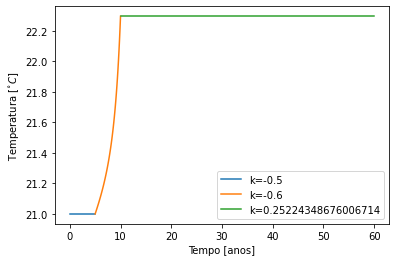

In [10]:
def codigo_parte_4():

  import numpy as np
  from scipy.integrate import odeint
  import matplotlib.pyplot as plt

  # Primeiro definimos a função DC, sendo ela
  def modelo(temperatura,t,valores_k):
    dcdt = (1/10) * (temperatura - 20) * (22- temperatura) * (temperatura - 26) - valores_k
    return dcdt

  def modelo2(temperatura,t,valores_k):
    dcdt = (1/10) * (y2[-1] - 20) * (22- y2[-1]) * (y2[-1] - 26) - valores_k
    return dcdt

  # Parametros
  temperatura = 21   
  k = [-0.5, -0.6]
  t = [np.linspace(0, 5), np.linspace(5,10), np.linspace(10, 60)]


  # Resolvendo a EDO
  y1 = odeint(modelo,temperatura,t[0],args=( k[0],))# valor_k[0],))
  y2 = odeint(modelo,y1[-1],t[1],args=(k[1],)) #valor_k[1],))
  k.append((1/10)*(y2[-1]-20)*(22-y2[-1])*(y2[-1]-26))
  y3 = odeint(modelo2, y2[-1],t[2],args=(k[2],))   # temperatura em 10 anos = 22.2965758


  # Gráfico
  #print(f'={" Gráfico para k igual a -0.5 , -0.6 e 0.252243487 e C0 = 21° ":=<100}')
  plt.plot(t[0],y1,label='k='+str(k[0]))
  plt.plot(t[1],y2,label='k='+str(k[1]))
  plt.plot(t[2],y3,label='k='+str(float(k[2])))
  plt.xlabel("Tempo [anos]")
  plt.ylabel(r"Temperatura $[^{\circ}C]$")
  plt.title("")
  plt.legend()
  plt.show()
  
  #Respostas ao exercicio
  #print(f'{"":=^100}')

  #print(f'A)\nResposta: Com base no gráfico temperatura no equador no momento da transição de  k=−0.5  a  k=−0.6 é {y1[-1]}° ')
  #print('B)\nResposta: Com base no gráfico a tendência da temperatura é aumentar 5 anos após da mudança.')
  #print(f'C)\nResposta: Sabendo que a temperatura no equador após dez anos é {y2[-1]}°.\n'
  #       'E através da analise dos gráficos da questão 2 vemos que o menor k possivel para que a temperatura do equador não aumente nos próximos 50 '
  #       f'anos é {k[2]}.\nComo pode ser comprovado no gráfico acima.')
 

codigo_parte_4()

* No momento da transição entre os valores de $k$, a temperatura no equador é $C_{0}=21$ºC.

* Após a mudança na desregularização, o valor da temperatura aumenta.

* Por último, vemos que após 5 anos da mudança n desregularização, $k$ para $-0,6$, teremos uma temperatura de 22.2965758°, e conseguimos encontrar que o menor $k$ possivel para que a temperatura do equador não aumente nos próximos 50 anos é 0.25224348676006714.
Como pode ser comprovado no gráfico acima. 